In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# metrics
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.metrics import categorical_crossentropy
from keras.datasets import mnist
from PIL import Image, ImageOps
from PIL import Image as im


plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def find_digits(Img):
  _,I = cv2.threshold(Img,0.,255.,cv2.THRESH_OTSU)
  I = cv2.bitwise_not(I)

  _,labels,stats,centroid = cv2.connectedComponentsWithStats(I)

  result = np.zeros((I.shape[0],I.shape[1],3),np.uint8)

  Contours =[]
  Roll_No = []
  Marks = []
  for i in range(0,labels.max()+1):
    mask = cv2.compare(labels,i,cv2.CMP_EQ)

    ctrs,_ = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in ctrs:
      x,y,h,w =cv2.boundingRect(cnt)
      aspect_ratio = float(w)/h
      #print('x',x,'y',y,'z',h,'w',w)
      #print(aspect_ratio)
      if (w >50 and w<200):
        Contours.append(cnt)
        #print('x',x,'y',y,'z',h,'w',w)
        aspect_ratio = float(w)/h
        #print(aspect_ratio)
        #cv2.rectangle(I,(x,y),(x+h,y+w),(255,0,0),3)
        if y> 700:
          Marks.append(cnt)
        if y < 100:
          Roll_No.append(cnt)
          #print('x',x,'y',y,'z',h,'w',w)
          aspect_ratio = float(w)/h
          #print('Roll_No',aspect_ratio)


  Roll_No_Asc=[]
  Marks_Asc =[]
  X1 =[]
  X2 = []

  for cnt in Roll_No:
    x1,y,h,w =cv2.boundingRect(cnt)
    X1.append(x1)
  print(X1)
  X1.sort()
  print(X1)

  i=0
  while len(Roll_No)!=0:
    for cnt in Roll_No:
      x,y,h,w =cv2.boundingRect(cnt)
      if x == X1[i]:
        Roll_No_Asc.append(cnt)
        Roll_No.remove(cnt)
        i=i+1
  char = []
  for cnt in Roll_No_Asc:
    x,y,h,w =cv2.boundingRect(cnt)
    char.append(Img[y-10:y+w+10,x-10:x+h+10])

  for cnt in Marks:
    x2,y,h,w =cv2.boundingRect(cnt)
    X2.append(x2)
  print(X2)
  X2.sort()
  print(X2)

  i=0
  while len(Marks)!=0:
    for cnt in Marks:
      x,y,h,w =cv2.boundingRect(cnt)
      if x == X2[i]:
        Marks_Asc.append(cnt)
        Marks.remove(cnt)
        i=i+1


  for cnt in Marks_Asc:
    x,y,h,w =cv2.boundingRect(cnt)
    char.append(Img[y-10:y+w+10,x-10:x+h+10])




  result = cv2.drawContours(result,Contours,-1,(255,255,255),3)
  #x,y,h,w =cv2.boundingRect(Roll_No)
  #print('x',x,'y',y,'z',h,'w',w)
  cv2_imshow(result)
  #cv2_imshow(I)
  return char

In [ ]:
def preprocess_chars(char):

  X_new = []

  for ch in char:
    img1= im.fromarray(ch)
    ret11,th = cv2.threshold(np.array(img1),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    imgbw = img1.point(lambda p:p > ret11 and 255)
    kernal = np.ones((5,5),np.uint8)
    erosion = cv2.dilate(np.array(imgbw),kernal,iterations = 2)
    erosion = cv2.bitwise_not(erosion)
    erosion = np.array(erosion)
    erosion = cv2.resize(erosion, (28,28))
    X_new.append(erosion)
  for i in range(10):
    cv2_imshow(X_new[i])
  X_new = np.asarray(X_new)
  return X_new



In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
def Recognition(X_new):
  chars =[]
  for i in range(10):
    img = X_new[i]
    cv2_imshow(img)
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    # one-hot vector output
    vec_p1 = model.predict(img)
    print(vec_p1)
    # determine the lable corresponding to vec_p
    Y_p1 = np.argmax(vec_p1)
    print(Y_p1)
    chars.append(Y_p1)
  return chars

def Roll_No_Marks(chars):
  Roll_no = str(chars[0]) + str(chars[1]) + str(chars[2])+ str(chars[3])+ str(chars[4])+ str(chars[5])+ str(chars[6])+ str(chars[7])
  print('Roll_no',Roll_no)
  Mark = str(chars[8]) + str(chars[9])
  print('Mark',Mark)
  return Roll_no,Mark


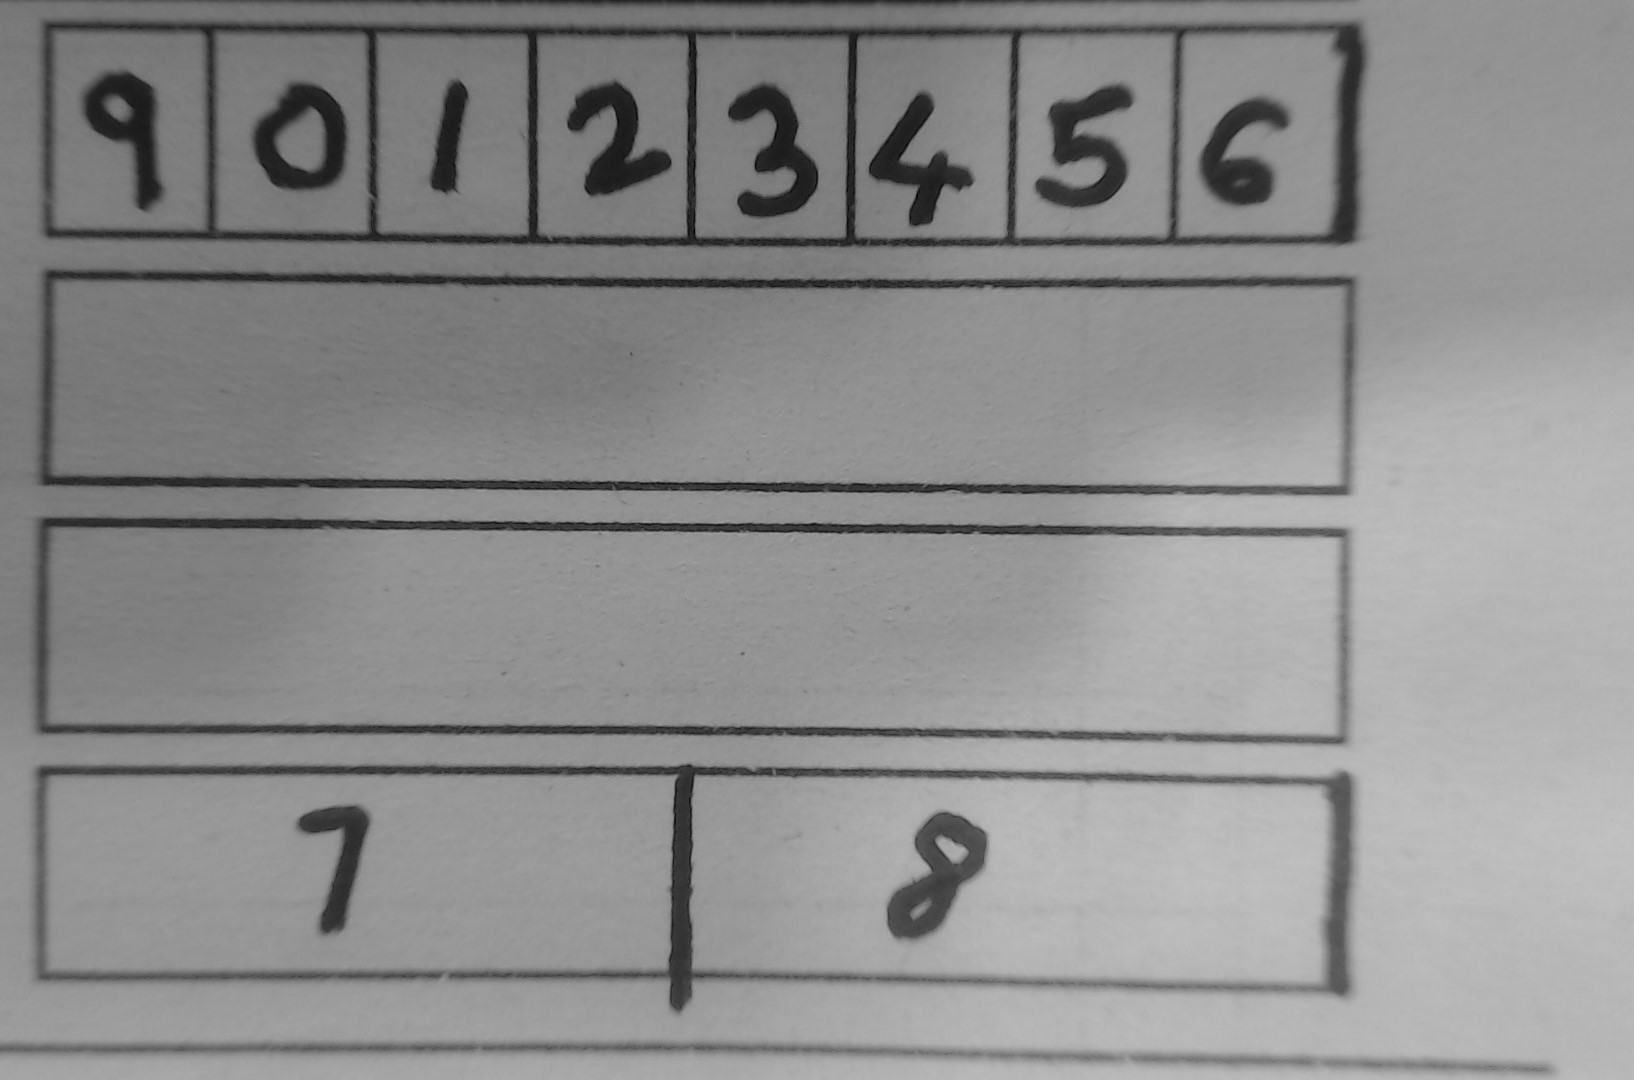

[79, 428, 566, 250, 728, 1035, 867, 1199]
[79, 250, 428, 566, 728, 867, 1035, 1199]
[297, 887]
[297, 887]


<ipython-input-8-d0bf4ae8e27a>:54: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  Roll_No.remove(cnt)


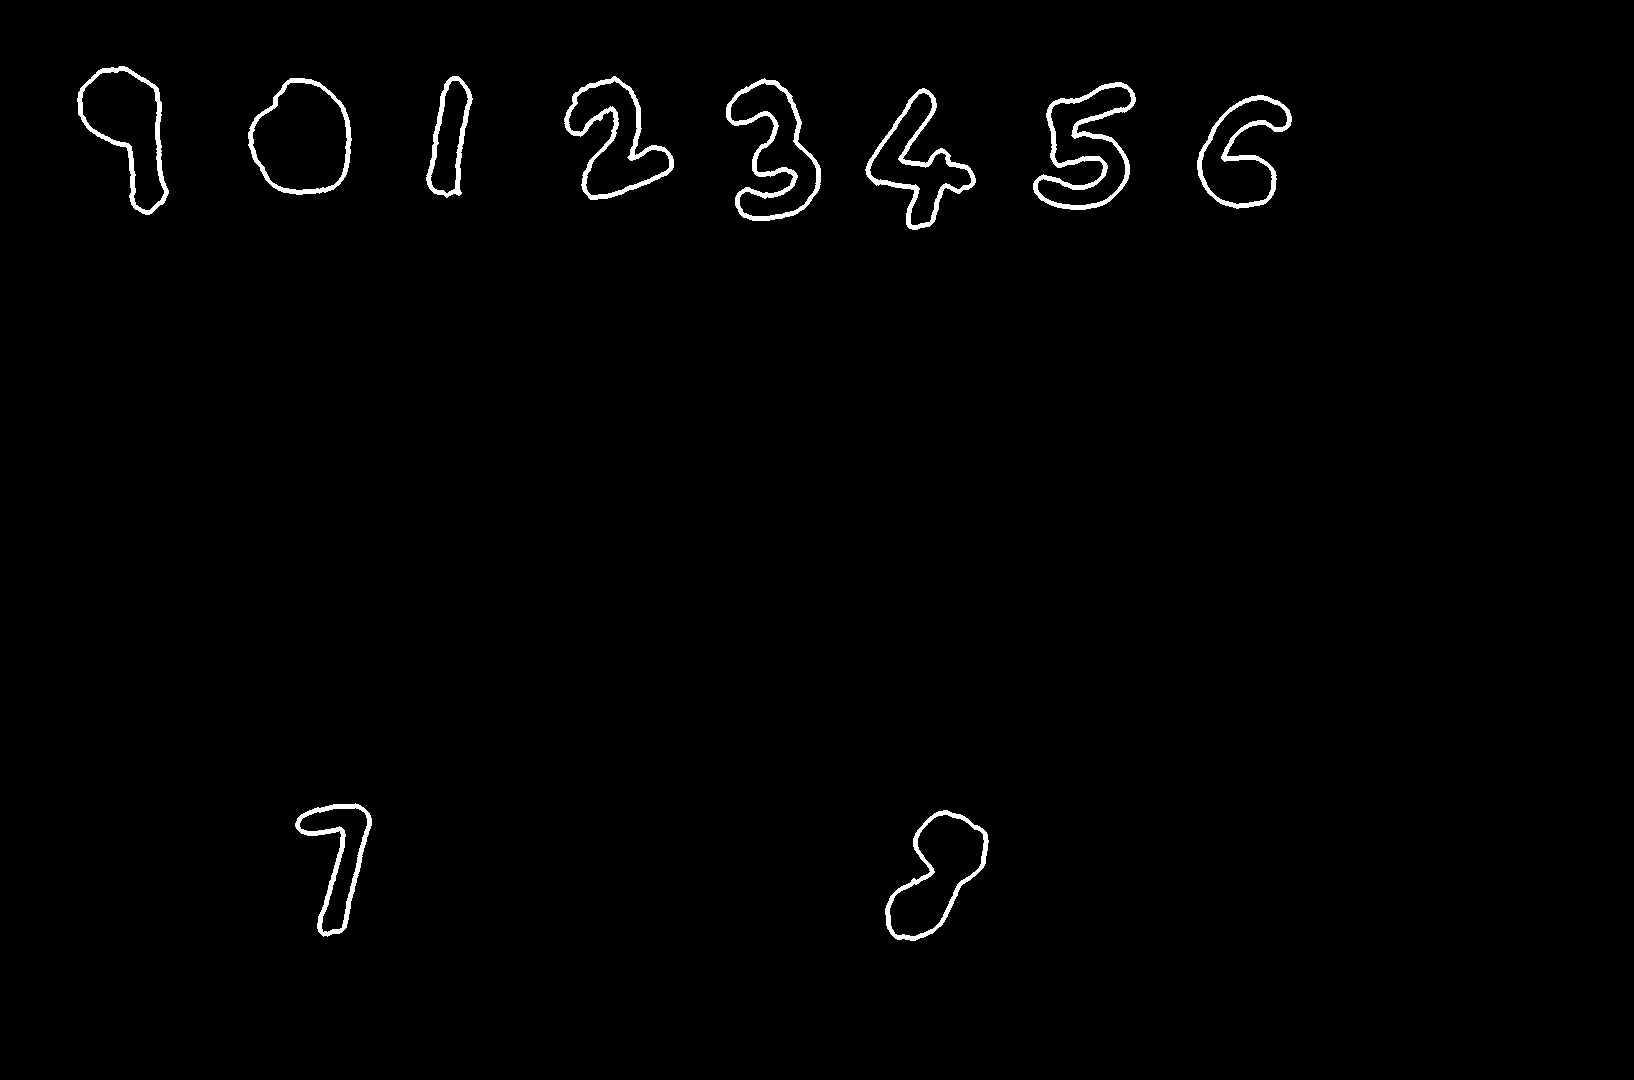

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 batch_normalization_7 (Batc  (None, 8, 8, 32)         128       
 hNormalization)                                                 
                                                      

1/1 [==============================] - 8s 8s/step
[[1.8284347e-09 6.1176947e-10 5.4728371e-08 6.0076439e-07 1.7293734e-05
  2.8976345e-08 2.8184621e-10 5.9876675e-06 7.7634477e-06 9.9996829e-01]]
9


1/1 [==============================] - 0s 28ms/step
[[1.00000000e+00 5.40030520e-10 1.10147669e-10 1.26908805e-11
  3.79096546e-11 7.33808413e-12 8.77801209e-09 1.39440626e-10
  7.63340294e-11 8.88312801e-09]]
0


1/1 [==============================] - 0s 17ms/step
[[7.8628828e-14 1.0000000e+00 6.2257116e-11 5.3664356e-12 5.6195888e-09
  2.8307892e-12 4.1828079e-11 4.1662485e-10 8.1603552e-10 1.1696049e-11]]
1


1/1 [==============================] - 0s 21ms/step
[[1.0191783e-16 3.5870151e-16 1.0000000e+00 3.6924902e-15 1.1102308e-16
  1.0783628e-21 8.2810345e-15 3.0832148e-15 6.3357068e-14 2.0331117e-16]]
2


1/1 [==============================] - 0s 22ms/step
[[6.2230725e-14 4.9722448e-11 9.7826035e-07 9.9999905e-01 5.2270657e-14
  3.6627654e-12 1.9798728e-14 3.5231269e-11 5.0099599e-12 6.9114799e-13]]
3


1/1 [==============================] - 0s 20ms/step
[[2.4498645e-18 1.3411783e-15 1.7658735e-15 4.2556316e-28 1.0000000e+00
  4.2602869e-16 6.8889079e-15 6.7050607e-15 3.4717428e-13 2.5842379e-11]]
4


1/1 [==============================] - 0s 22ms/step
[[2.3481697e-18 5.2237766e-16 8.5848040e-23 2.4101578e-11 3.8302871e-18
  1.0000000e+00 1.4822256e-12 8.3045410e-22 5.7896708e-14 8.9216368e-13]]
5


1/1 [==============================] - 0s 19ms/step
[[8.0175026e-11 6.0724631e-15 1.2829747e-12 1.6211925e-15 6.5940088e-12
  1.2329679e-09 1.0000000e+00 2.9979100e-23 3.7691751e-12 8.5174015e-14]]
6


1/1 [==============================] - 0s 20ms/step
[[1.0121821e-12 1.0767131e-07 2.5386015e-07 1.4124319e-08 1.1921709e-05
  6.9907274e-12 5.5512763e-20 9.9998772e-01 6.6202821e-11 3.2044412e-09]]
7


1/1 [==============================] - 0s 17ms/step
[[1.2879173e-12 4.2790638e-13 2.3502075e-07 2.6599101e-11 1.9369740e-11
  1.4346141e-13 2.6568513e-12 9.4631507e-12 9.9999976e-01 2.5579727e-10]]
8
Roll_no 90123456
Mark 78


In [ ]:
#Reading Image
Img = cv2.imread('Sup1.jpg',cv2.IMREAD_GRAYSCALE)
cv2_imshow(Img)

#finding digits in image
char = find_digits(Img)

#preprocess Digits
X_new = preprocess_chars(char)

#load model
model = load_model('/content/drive/MyDrive/HCR Project/Models/model5.h5')

#summarize model.
model.summary()

#Recognition of Digits
chars = Recognition(X_new)

#Getting Roll_No and Mark
Roll_No,Marks = Roll_No_Marks(chars)


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#sh = gc.create('Colab with Excel')

# Open our new sheet and add some data.
worksheet = gc.open('Colab with Excel').sheet1


In [ ]:
cell_list = worksheet.range('A2:B2')

In [ ]:
data= []
data.append(Roll_No)
data.append(Marks)

In [ ]:
i=0
for cell in cell_list:
      cell.value = data[i]
      i=i+1


In [ ]:
worksheet.update_cells(cell_list)

{'spreadsheetId': '1lQZYiKuIccoKmkQjde_amL3oEaXhJ01uoT73TWmIvQg',
 'updatedRange': 'Sheet1!A1:B1',
 'updatedRows': 1,
 'updatedColumns': 2,
 'updatedCells': 2}